In [11]:
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

%matplotlib inline

In [12]:
# Download 10% of the wider_face dataset train split
ds, ds_info = tfds.load('wider_face', split='train', with_info=True, shuffle_files=True, data_dir='../data/wider')
assert isinstance(ds, tf.data.Dataset)
print(ds)

<_OptionsDataset shapes: {faces: {bbox: (None, 4), blur: (None,), expression: (None,), illumination: (None,), invalid: (None,), occlusion: (None,), pose: (None,)}, image: (None, None, 3), image/filename: ()}, types: {faces: {bbox: tf.float32, blur: tf.uint8, expression: tf.bool, illumination: tf.bool, invalid: tf.bool, occlusion: tf.uint8, pose: tf.bool}, image: tf.uint8, image/filename: tf.string}>


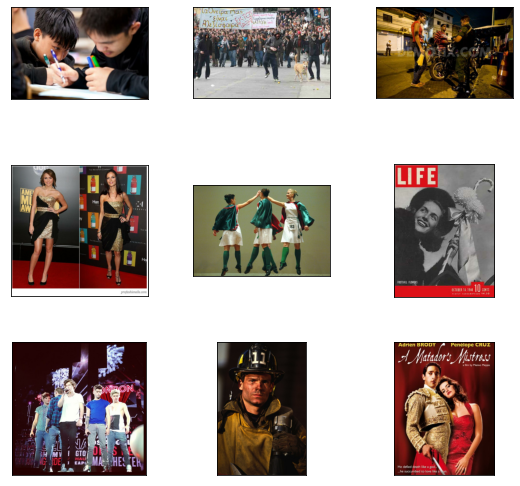

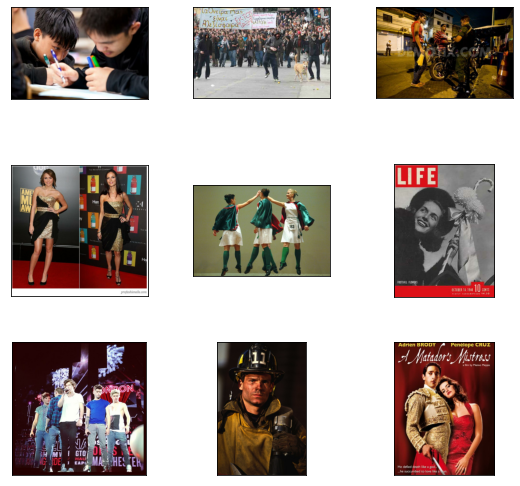

In [13]:
tfds.show_examples(ds, ds_info)

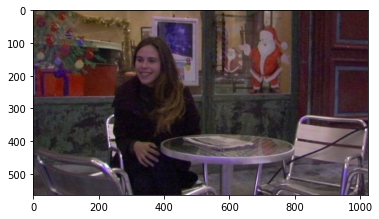

In [281]:
ds_np = list(tfds.as_numpy(ds.take(10)))
example = ds_np[0]

faces = example['faces']['bbox']
image = example['image']
filename = example['image/filename']

plt.imshow(image)

[0.19469027 0.30664062 0.4        0.3828125 ]


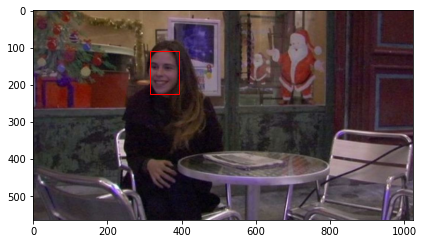

In [282]:
fig, ax = plt.subplots(1)

w = image.shape[1]
h = image.shape[0]

ax.imshow(image)

for face in faces:
    print(face)
    
    rect = patches.Rectangle((face[1] * w, face[0] * h), (face[3] - face[1]) * w, (face[2] - face[0]) * h, edgecolor='r', facecolor='None')
    ax.add_patch(rect)

plt.tight_layout()
plt.draw()
plt.show()